## A Machine Learning Project for Screening Resumes

### Exploratory Data Analysis (EDA)

#### Importing the necessary libraries, reading the data and performing basic checks on the data

In [137]:
# importing the required libraries

import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [138]:
# importing and reading the .csv file

df = pd.read_csv('ResumeDataSet.csv')
print("The number of rows are", df.shape[0],"and the number of columns are", df.shape[1])
df.head()

The number of rows are 962 and the number of columns are 2


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [139]:
# Checking the information of the dataframe(i.e the dataset)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [140]:
# Checking all the different unique values

df.nunique()

Category     25
Resume      166
dtype: int64

#### Plotting the share of each Category as a count plot and pie plot

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

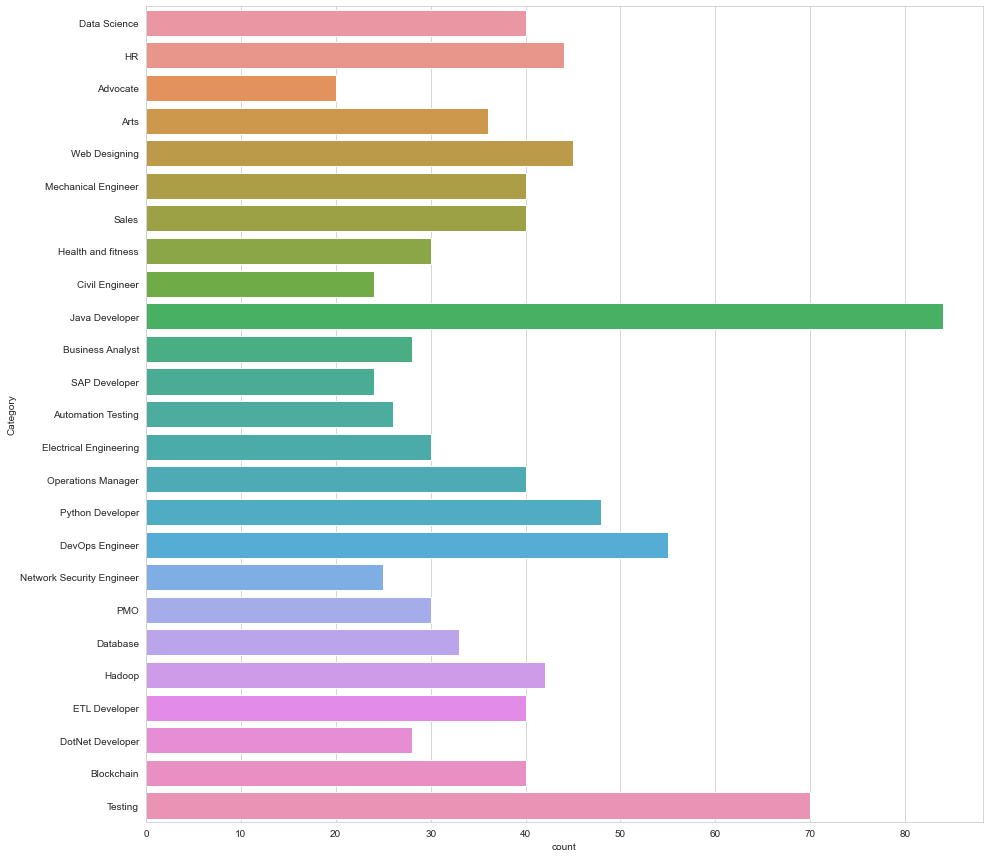

In [141]:
# Plotting the distribution of Categories as a Count Plot

plt.figure(figsize = (15,15))
sns.countplot(y = "Category", data = df)
df["Category"].value_counts()

Java Developer               8.73
Testing                      7.28
DevOps Engineer              5.72
Python Developer             4.99
Web Designing                4.68
HR                           4.57
Hadoop                       4.37
Data Science                 4.16
Operations Manager           4.16
Mechanical Engineer          4.16
Sales                        4.16
ETL Developer                4.16
Blockchain                   4.16
Arts                         3.74
Database                     3.43
PMO                          3.12
Electrical Engineering       3.12
Health and fitness           3.12
Business Analyst             2.91
DotNet Developer             2.91
Automation Testing           2.70
Network Security Engineer    2.60
Civil Engineer               2.49
SAP Developer                2.49
Advocate                     2.08
Name: Category, dtype: float64

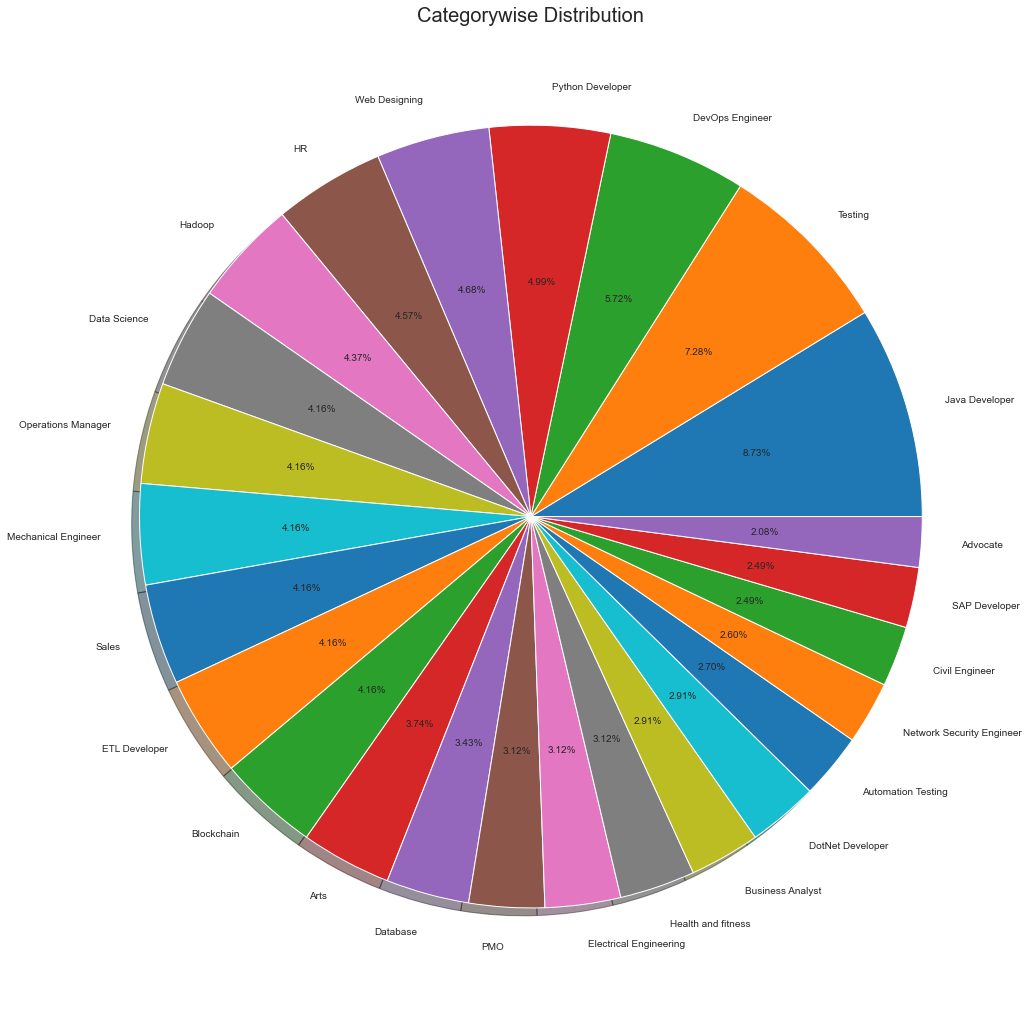

In [142]:
# Plotting the distribution of Categories as a Pie Plot

plt.figure(figsize = (18,18))
Category = df['Category'].value_counts().reset_index()['Category']
Labels = df['Category'].value_counts().reset_index()['index']
plt.title("Categorywise Distribution", fontsize=20)
plt.pie(Category, labels = Labels, autopct = '%1.2f%%', shadow = True)
df["Category"].value_counts()*100/df.shape[0]

### Preprocessing our dataset

#### Cleaning out all the unnecessary content from the Resume column

In [143]:
# Function to clean the data

def clean(data):
    data = re.sub('httpS+s*', ' ', data)                                                    # Removing the links
    data = re.sub('RT|cc', ' ', data)                                                       # Removing the RT and cc
    data = re.sub('#S+', ' ', data)                                                         # Removing the hashtags
    data = re.sub('@S+', ' ', data)                                                         # Removing the mentions
    data = data.lower()                                                                     # Changing the test to lowercase
    data = ''.join([i if 32 < ord(i) < 128 else ' ' for i in data])                         # Removing all the special characters
    data = re.sub('s+', 's', data)                                                          # Removing extra whitespaces
    data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', data)     # Removing punctuations
    return data
cleaned_df = df['Category'].to_frame()
cleaned_df['Resume'] = df['Resume'].apply(lambda x: clean(x))                               # Applying the clean function 
cleaned_df

,Category,Resume
0,Data Science,skills programming languages python pandas...
1,Data Science,education details may 2013 to may 2017 b e ...
2,Data Science,areas of interest deep learning control syste...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad...
...,...,...
957,Testing,computer skills proficient in ms office ...
958,Testing,willingnes to a ept the challenges po...
959,Testing,personal skills quick learner eagerne...
960,Testing,computer skills software knowledge ms power ...


#### Encoding the Category data

In [144]:
# Encoding the Category column using LabelEncoder

encoder = LabelEncoder()
cleaned_df['Category'] = encoder.fit_transform(cleaned_df['Category'])
cleaned_df

,Category,Resume
0,6,skills programming languages python pandas...
1,6,education details may 2013 to may 2017 b e ...
2,6,areas of interest deep learning control syste...
3,6,skills r python sap hana table...
4,6,education details mca ymcaust faridabad...
...,...,...
957,23,computer skills proficient in ms office ...
958,23,willingnes to a ept the challenges po...
959,23,personal skills quick learner eagerne...
960,23,computer skills software knowledge ms power ...


In [150]:
# Encoded Classes

encoder.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

#### Creating a Word Vector using TfidfVectorizer

In [145]:
# Creating a Word Vectorizer and transforming it

Resume = cleaned_df['Resume'].values
Category = cleaned_df['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = 'english', max_features = 1000)
word_vectorizer.fit(Resume)
WordFeatures = word_vectorizer.transform(Resume)

### Training our Machine Learning Model

#### Splitting the dataset into train and test data

In [146]:
# Splitting the data into train, test, printing the shape of each and running KNeighborsClassifier with OneVsRest method.
 
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, Category, random_state=2, test_size = 0.2)
print(f'The shape of the training data {X_train.shape}')
print(f'The shape of the test data {X_test.shape}')
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

The shape of the training data (769, 1000)
The shape of the test data (193, 1000)


OneVsRestClassifier(estimator=KNeighborsClassifier())

#### Computing the accuracy metrics and classification report

In [153]:
# Predicting the values using the model built with train data and checking the appropriate metrics

prediction = clf.predict(X_test)
print(f'Accuracy of KNeighbors Classifier on test set: {clf.score(X_test, y_test):.2f}\n')
print(f'The classification report \n {metrics.classification_report(y_test, prediction)}\n\n')

Accuracy of KNeighbors Classifier on test set: 0.98

The classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
